# E-tivity 3: Clustering and Manifold Learning

## Student Name: Vipul Popat
## Student ID: 18195121


Use this notebook to complete Tasks 1 and 2 in E-tivity3.

### Import Python Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import manifold
from sklearn import cluster
from sklearn import preprocessing

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load the dataset into pandas dataframe
df = pd.read_csv("loans_dataset_et3.csv")

In [3]:
df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,2483,2466.0,90,180,0
1,4917,0.0,130,360,0
2,4106,0.0,40,180,1
3,3859,3300.0,142,180,1
4,6417,0.0,157,180,1


In [4]:
df.shape

(332, 5)

In [5]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,332.000000,332.000000,332.000000,332.000000,332.000000
mean,5201.093373,1495.508795,140.882530,341.710843,0.978916
std,4584.815491,1982.742932,75.544237,61.651497,0.143882
min,645.000000,0.000000,17.000000,60.000000,0.000000
25%,2912.750000,0.000000,100.000000,360.000000,1.000000
50%,3858.500000,1211.500000,128.000000,360.000000,1.000000
75%,5818.250000,2250.000000,162.000000,360.000000,1.000000
max,39999.000000,20000.000000,600.000000,480.000000,1.000000


In [6]:
# to check whether any of the values are null 
df.isna().sum()

X = df.drop('Credit_History', axis=1)
y = df['Credit_History']

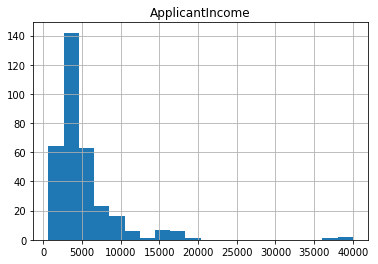

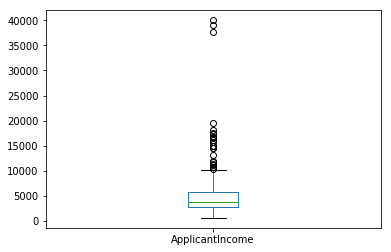

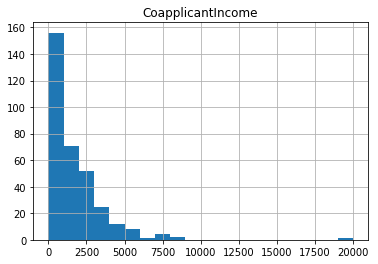

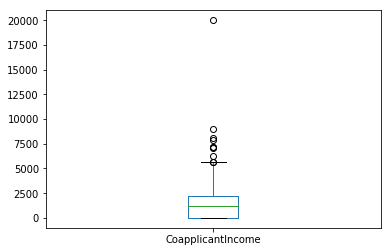

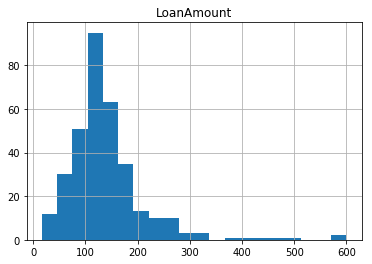

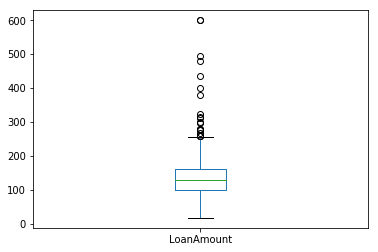

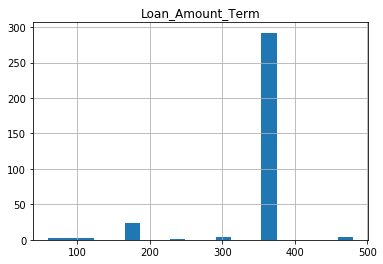

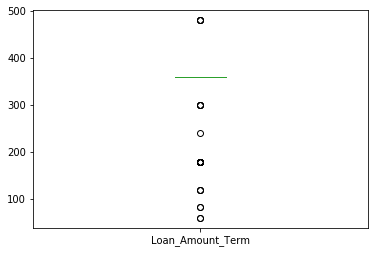

In [7]:
def plot_data(data):
    for col in data.columns:
        plt.title(col)
        data[col].hist(bins=20)
        plt.show()
        data[col].plot.box()
        plt.show()

plot_data(X)

## Task 1 (CS5062)

Cluster loans_dataset_et3.csv with the k-Means clustering algorithm and visualise the clustering. Use an appropriate feature-scaling technique and pick a value of k suggested by MDS and t-SNE visualisations of the dataset. Experiment with various values of the parameters of k-Means. Aim at producing a meaningful clustering that allows you to describe the clusters with words. Write a short conclusion about the characteristics of the clusters (max 250 words).

### Check if there are any outlier as it may affect the scaling algorithm



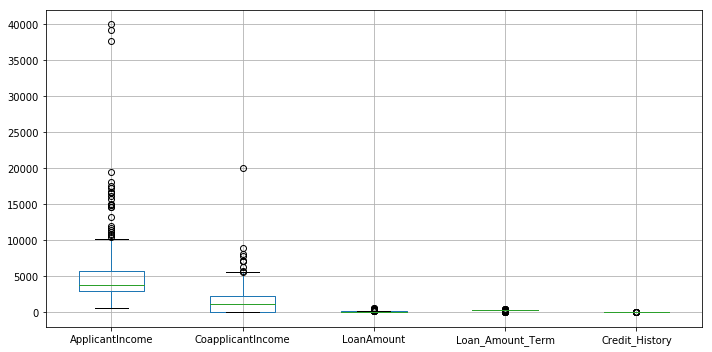

In [8]:
df.boxplot(figsize=(10,5))

plt.tight_layout()
plt.show()

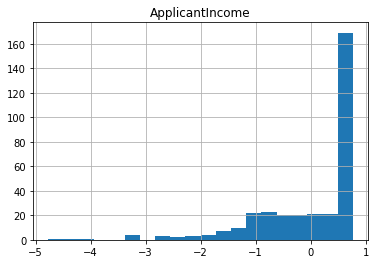

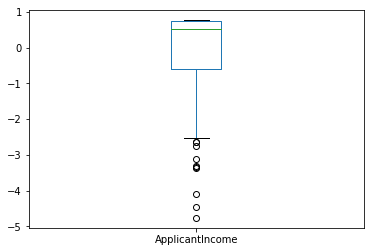

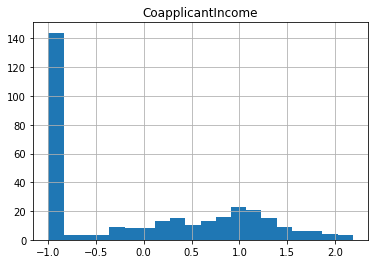

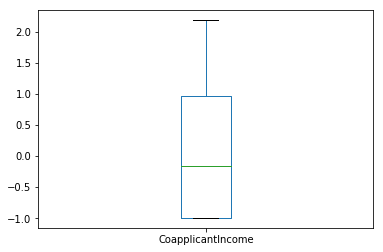

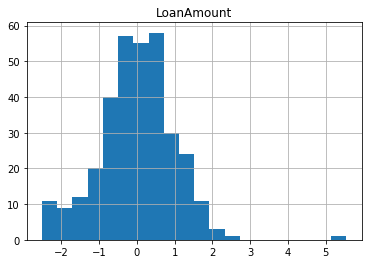

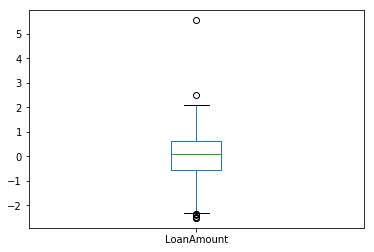

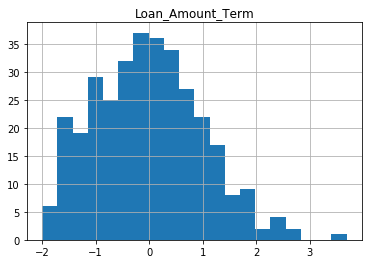

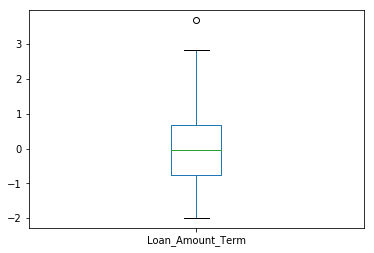

In [9]:
normalizer = preprocessing.Normalizer()
normalized_data = normalizer.fit_transform(X)

standard_scaler = preprocessing.StandardScaler()
df_data = standard_scaler.fit_transform(normalized_data)

scaled_X = pd.DataFrame(df_data, columns=X.columns)

y_labels = np.array(y.values, dtype=float)

plot_data(scaled_X)

### Scatterplot function for visualization of clusters

In [10]:
colors = np.array(['orange', 'blue', 'lime', 'blue', 'khaki', 'pink', 'green', 'purple'])

# points - a 2D array of (x,y) coordinates of data points
# labels - an array of numeric labels in the interval [0..k-1], one for each point
# centers - a 2D array of (x, y) coordinates of cluster centers
# title - title of the plot

def clustering_scatterplot(points, labels, centers, title):
    # plot the examples, i.e. the data points
    
    n_clusters = np.unique(labels).size
    for i in range(n_clusters):
        h = plt.scatter(points[labels==i,0],
                        points[labels==i,1], 
                        c=colors[i%colors.size],
                        label = 'cluster '+str(i))

    # plot the centers of the clusters
    if centers is not None:
        plt.scatter(centers[:,0], centers[:,1], c='r', marker='*', s=500)

    _ = plt.title(title)
    _ = plt.legend()
    _ = plt.xlabel('x')
    _ = plt.ylabel('y')

### Plotting scatter plots with KMeans clustering along with MDS (Multi Dimensional Scaling) and t-SNE to project both the data and the k-Means cluster centers to a 2D space

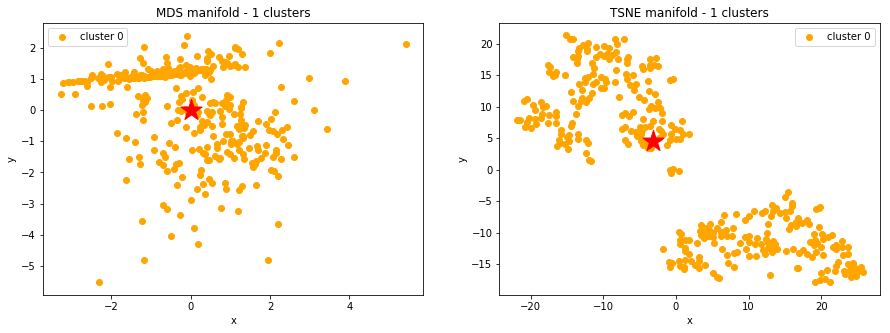

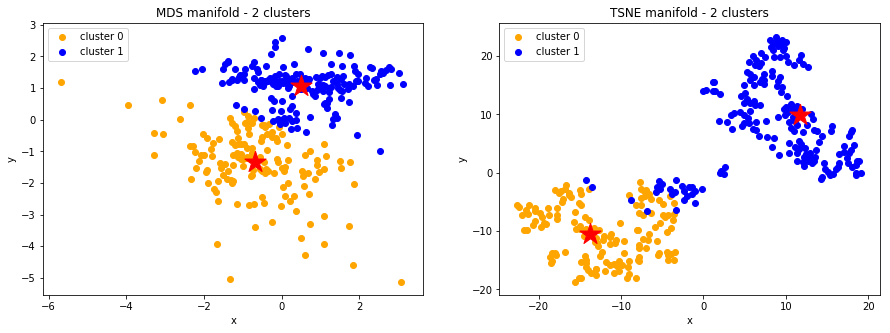

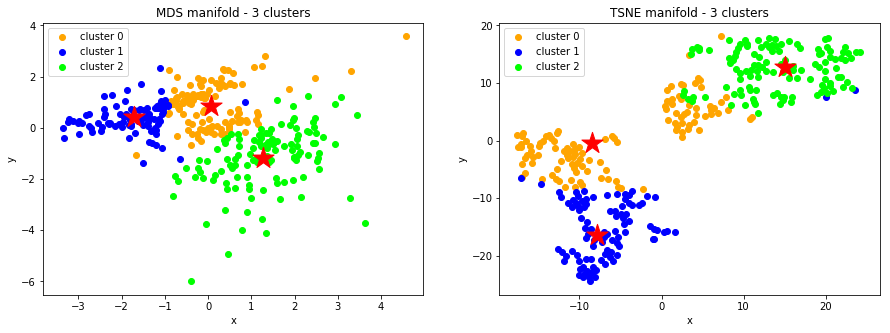

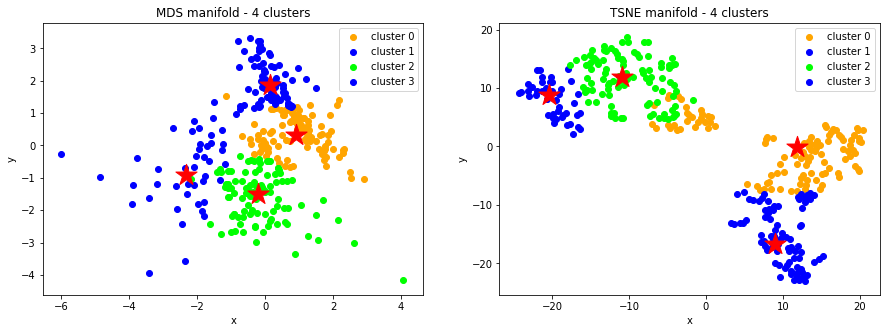

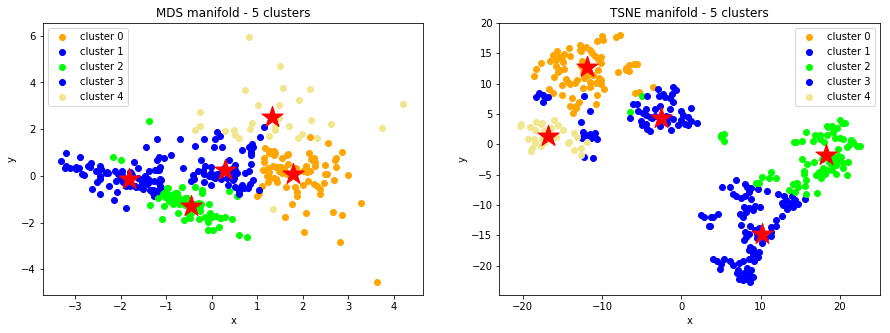

In [11]:
for k in range(1,6):
    # Run KMeans algorithm
    clustered_data_sklearn = cluster.KMeans(n_clusters=k, n_init=10,  init='k-means++', max_iter=1000, random_state=10, copy_x=True).fit(df_data)
    
    # Create new array composed of data + k centers 
    df_data_and_centers = np.r_[df_data,clustered_data_sklearn.cluster_centers_]

    f, axs = plt.subplots(1, 2, figsize=(15, 5))

    # MDS
    plt.subplot(1, 2, 1)
    XYcoordinates = manifold.MDS(n_components=2).fit_transform(df_data_and_centers)
    clustering_scatterplot(points=XYcoordinates[:-k,:], 
                           labels=clustered_data_sklearn.labels_, 
                           centers=XYcoordinates[-k:,:], 
                           title='MDS manifold - ' + str(k) + ' clusters')

    # TSE
    plt.subplot(1, 2, 2)
    XYcoordinates = manifold.TSNE(n_components=2).fit_transform(df_data_and_centers)
    clustering_scatterplot(points=XYcoordinates[:-k,:], 
                           labels=clustered_data_sklearn.labels_,
                           centers=XYcoordinates[-k:,:], 
                           title='TSNE manifold - ' + str(k) + ' clusters')

    plt.show()
    if k == 5:
        selected_clustered_data_sklearn = clustered_data_sklearn


In [12]:
df['cluster'] = pd.Series(selected_clustered_data_sklearn.labels_, index=df.index)
df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,cluster
0,2483,2466.0,90,180,0,4
1,4917,0.0,130,360,0,2
2,4106,0.0,40,180,1,1
3,3859,3300.0,142,180,1,3
4,6417,0.0,157,180,1,1


In [13]:
df.groupby('cluster').mean()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
cluster,,,,,
0,2559.000000,2066.013333,123.613333,362.400000,1.000000
1,9679.044444,349.211111,165.111111,315.866667,0.988889
2,3797.226667,95.068267,103.453333,359.200000,0.973333
3,4629.967742,2377.545161,170.580645,342.580645,0.967742
4,3062.466667,5186.366667,143.566667,322.000000,0.933333


In [14]:
df.groupby('cluster').count()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
cluster,,,,,
0,75,75,75,75,75
1,90,90,90,90,90
2,75,75,75,75,75
3,62,62,62,62,62
4,30,30,30,30,30


### Conclusions
- We can see group 1 has significantly high ApplicantIncome and very less CoApplicant Income. Also Group 1 has the customers with the smallest loan term periods.
- Group 4 has the customers with bad credit history. It also appear like bank still disburses the loan to customers with bad credit history.
- Group 3 signifies that Co-applicant income is nearly half of the applicant income and the loan amount disbursed is the maximum amongst all the groups.

## Task 2 (CS5062)

Plot the sum of squared distances from the data points (in loans_dataset_et3.csv) to the centers of the k-Means clusters for various values of k. Use the Elbow method to pick the best value of k. Attempt also another method for determining the best value of k. If these methods suggest a different value of k (from the one you used in Task 1), then compute a new k-Means clustering.

Reference: https://stackoverflow.com/questions/19197715/scikit-learn-k-means-elbow-criterion

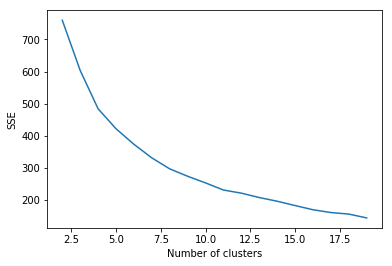

In [15]:
sse = {}
for k in range(2, 20):
    kmeans = cluster.KMeans(n_clusters=k, n_init=10,  init='k-means++', max_iter=1000, random_state=10, copy_x=True).fit(df_data)
    df["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of clusters")
plt.ylabel("SSE")
plt.show()

The goal is to choose a small value of k that still has a low SSE, and the elbow usually represents where we start to have diminishing returns by increasing k.
We can see in the above plot, 5 is the optimal number of clusters for the dataset, which is indeed correct.

Alternative method to get the value of k

### Silhouette Coefficient Method

Reference: http://www.awesomestats.in/python-cluster-validation/


In [16]:
from sklearn.metrics import silhouette_samples, silhouette_score

For n_clusters = 2 The average silhouette_score is : 0.4013249596295539


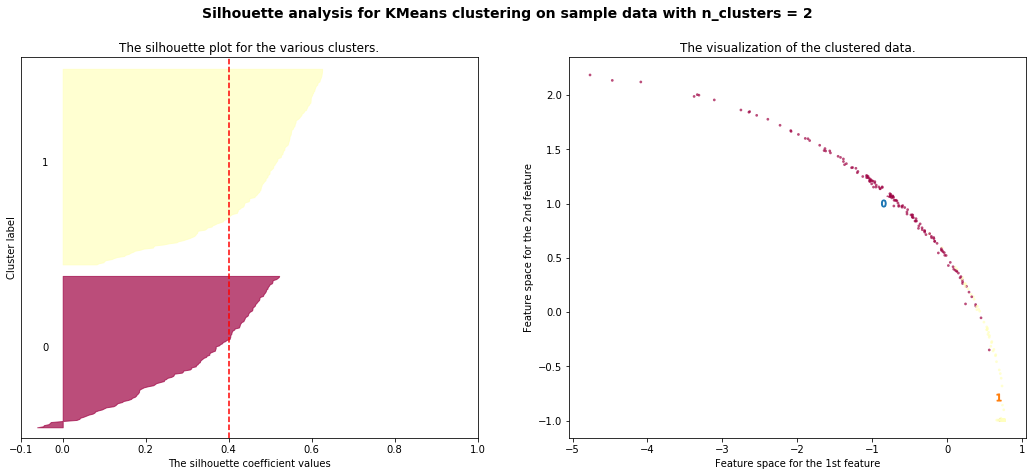

For n_clusters = 3 The average silhouette_score is : 0.3080127285227629


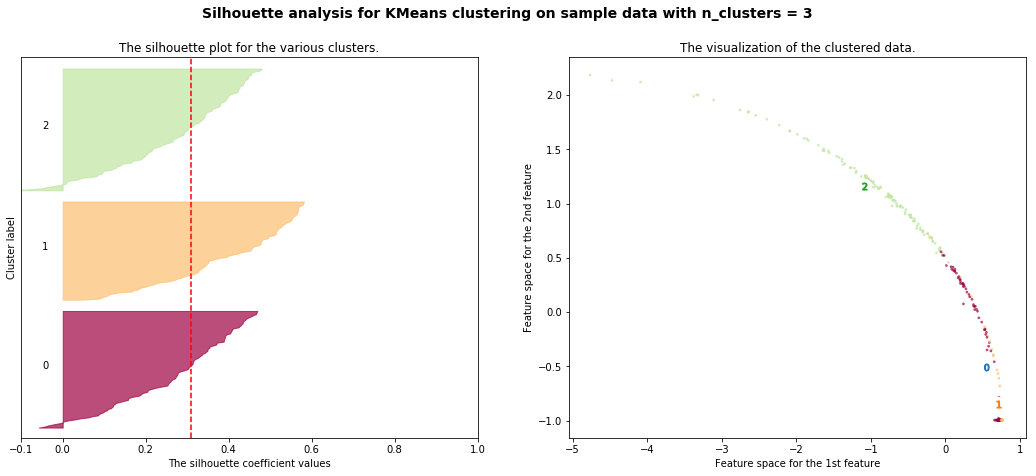

For n_clusters = 4 The average silhouette_score is : 0.306593452893065


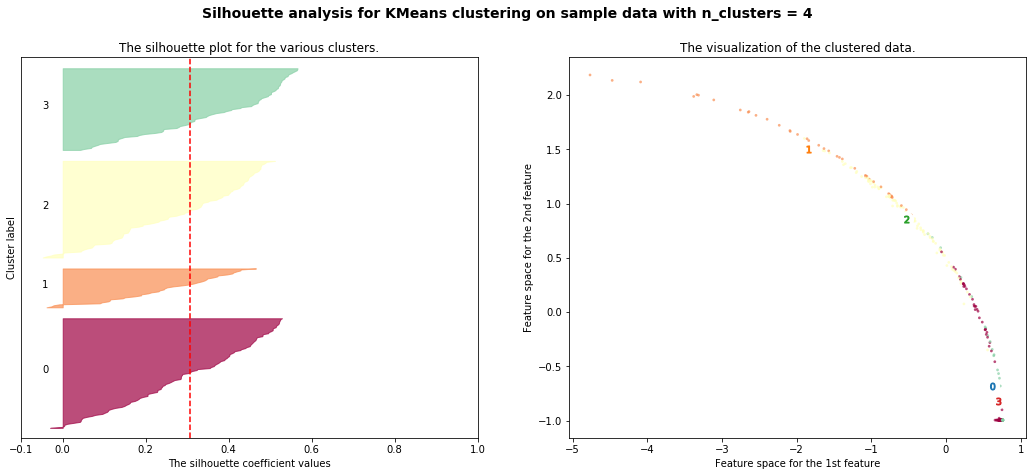

For n_clusters = 5 The average silhouette_score is : 0.30732901613575886


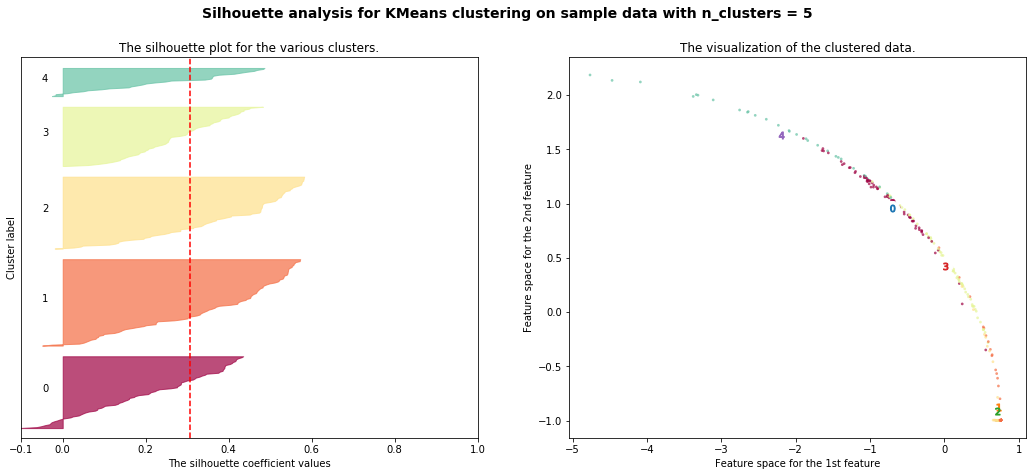

For n_clusters = 6 The average silhouette_score is : 0.2778379227901673


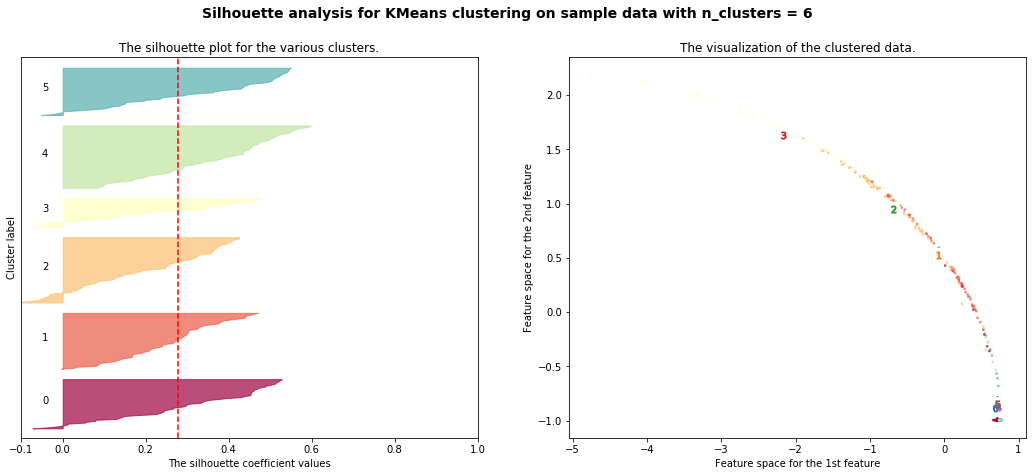

In [17]:
cluster_range = range( 2, 7 )

for n_clusters in cluster_range:
  # Create a subplot with 1 row and 2 columns
  fig, (ax1, ax2) = plt.subplots(1, 2)
  fig.set_size_inches(18, 7)

  # The 1st subplot is the silhouette plot
  # The silhouette coefficient can range from -1, 1 but in this example all
  # lie within [-0.1, 1]
  ax1.set_xlim([-0.1, 1])
  # The (n_clusters+1)*10 is for inserting blank space between silhouette
  # plots of individual clusters, to demarcate them clearly.
  ax1.set_ylim([0, len(df_data) + (n_clusters + 1) * 10])

  # Initialize the clusterer with n_clusters value and a random generator
  # seed of 10 for reproducibility.
  clusterer = cluster.KMeans(n_clusters=n_clusters, n_init=10,  init='k-means++', max_iter=1000, random_state=10, copy_x=True).fit(df_data)
  cluster_labels = clusterer.fit_predict( df_data )

  # The silhouette_score gives the average value for all the samples.
  # This gives a perspective into the density and separation of the formed
  # clusters
  silhouette_avg = silhouette_score(df_data, cluster_labels)
  print("For n_clusters =", n_clusters,
        "The average silhouette_score is :", silhouette_avg)

  # Compute the silhouette scores for each sample
  sample_silhouette_values = silhouette_samples(df_data, cluster_labels)

  y_lower = 10
  for i in range(n_clusters):
      # Aggregate the silhouette scores for samples belonging to
      # cluster i, and sort them
      ith_cluster_silhouette_values = \
          sample_silhouette_values[cluster_labels == i]

      ith_cluster_silhouette_values.sort()

      size_cluster_i = ith_cluster_silhouette_values.shape[0]
      y_upper = y_lower + size_cluster_i

      color = plt.cm.Spectral(float(i) / n_clusters)
      ax1.fill_betweenx(np.arange(y_lower, y_upper),
                        0, ith_cluster_silhouette_values,
                        facecolor=color, edgecolor=color, alpha=0.7)

      # Label the silhouette plots with their cluster numbers at the middle
      ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

      # Compute the new y_lower for next plot
      y_lower = y_upper + 10  # 10 for the 0 samples

  ax1.set_title("The silhouette plot for the various clusters.")
  ax1.set_xlabel("The silhouette coefficient values")
  ax1.set_ylabel("Cluster label")

  # The vertical line for average silhoutte score of all the values
  ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

  ax1.set_yticks([])  # Clear the yaxis labels / ticks
  ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

  # 2nd Plot showing the actual clusters formed
  colors = plt.cm.Spectral(cluster_labels.astype(float) / n_clusters)
  ax2.scatter(df_data[:, 0], df_data[:, 1], marker='.', s=30, lw=0, alpha=0.7,
              c=colors)

  # Labeling the clusters
  centers = clusterer.cluster_centers_
  # Draw white circles at cluster centers
  ax2.scatter(centers[:, 0], centers[:, 1],
              marker='o', c="white", alpha=1, s=200)

  for i, c in enumerate(centers):
      ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

  ax2.set_title("The visualization of the clustered data.")
  ax2.set_xlabel("Feature space for the 1st feature")
  ax2.set_ylabel("Feature space for the 2nd feature")

  plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                "with n_clusters = %d" % n_clusters),
               fontsize=14, fontweight='bold')

  plt.show()

### Conclusion
- At 2 number of clusters, the size of the clusters vary. Cluster 1 has large of observations assigned where as cluser 1 has few observations.
- At 5 number of clusters, the cluster sizes are fairly homogeneous. All clusters have observations that are higher than the average Silhouette score. A few of the clusters have a very small amount of observations crossing the clusters
- At 4 & 6 number of clusters, the size of each clusters vary.


**Number of cluster = 5 would be good because all clusters are homogeneous and almost all clusters have observations that are more than the average Silhouette score. A very few members of some clusters have cross memberships.**

### Use another clustering algorithm (from the ones available in scikit-learn) for the same dataset and an appropriate manifold-learning technique to visualise it.

### Affinity Propagation

I’ll be quite honest with you: I’ve struggled to get my head around what affinity propagation is about! I understood that it clusters data by identifying a subset of representative examples, so called exemplars. And it does so by considering all data points as potential exemplars, but the rest is magic to me..

Hyperparameters:
- preference
    - can be used to control how many data points are selected as exemplars
- damping
    - damping factor dampfact should be at least 0.5 and less than 1
    - Higher damping factors will lead to slower convergence

##### References:    
- https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AffinityPropagation.html
- https://www.psi.toronto.edu/affinitypropagation/faq.html    

In [18]:
df.drop('cluster', axis=1, inplace=True)

(332, 4)
Converged after 118 iterations.


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

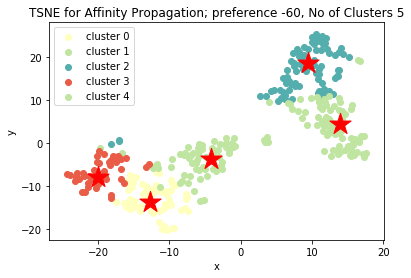

Converged after 116 iterations.


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

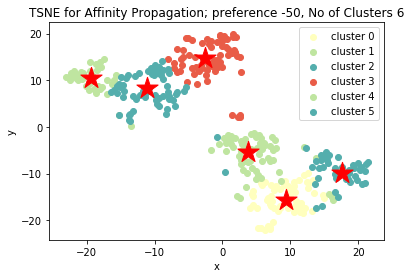

Converged after 117 iterations.


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

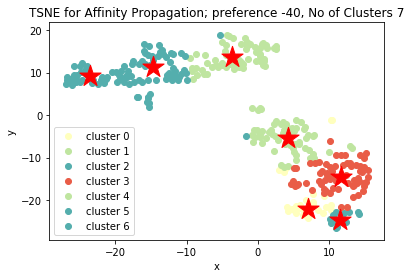

In [24]:
from sklearn.cluster import AffinityPropagation

def plot_affinity_propagation(data, preference):
  
    # Affinity Propagation
    af_clustering = cluster.AffinityPropagation(damping=0.8, 
                                                max_iter=500, 
                                                convergence_iter=100,  
                                                preference=preference, 
                                                verbose=True).fit(data)

    af_cluster_centers = af_clustering.cluster_centers_

    # get the number of clusters
    af_clusters = len(af_clustering.cluster_centers_indices_)

    # Append the cluster centers to the dataset
    af_data_and_centers = np.r_[data, af_cluster_centers]

    # project both the data and the cluster centers to a 2D space
    XYcoordinates = manifold.TSNE(n_components=2).fit_transform(af_data_and_centers)

    # plot the transformed examples and the centers
    clustering_scatterplot(points=XYcoordinates[:-af_clusters,:], 
                           labels=af_clustering.labels_, 
                           centers=XYcoordinates[-af_clusters:,:], 
                           title='TSNE for Affinity Propagation; preference {}, No of Clusters {}'.format(preference,af_clusters))
    plt.show()


print(df_data.shape)

# #############################################################################
# Compute Affinity Propagation
# Store the scaled data in X_scaled

max_preference = -30
min_preference = -60

for preference in range(min_preference, max_preference, 10):
    plot_affinity_propagation(df_data, preference)

k-means depends on a distance function and a parameter k that determines the number of clusters. Affinity propagation depends on a similarity function (which can be based on a distance function) and learns the number of clusters without having to be told it in advance.

I personally prefer to use affinity propagation over k-means in general. Not having to specify the number of clusters is huge, but affinity propagation is also very fast and deterministic. 